#**RECOMMENDATION SYSTEM **
###BUSINESS OVERVIEW
This project is aimed at providing personalized suggestions to movie-lovers based on their previously watched movies. The model is able to reduce a user’s time in searching for movies by recommending to them top five movies.

#### The objectives include:
* To understand user-movie viewership and movie-viewership and ratings.
* To predict ratings for unwatched movies.
* To recommend unwatched movies from the predicting model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing some libraries for data understanding and eexploration
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
movies = pd.read_csv('/content/drive/My Drive/recommendation-sys/ml-latest-small/movies.csv')
print('THE MOVIES DATASET:')
print(movies.head())
print('...\n')
print('THE OVERVIEW:')
print(movies.info())

THE MOVIES DATASET:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
...

THE OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [4]:
ratings = pd.read_csv('/content/drive/My Drive/recommendation-sys/ml-latest-small/ratings.csv')
print('THE RATINGS DATASET:')
print(ratings.head())
print('...\n')
print('THE OVERVIEW:')
print(ratings.info())

THE RATINGS DATASET:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
...

THE OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


The movies dataset contains the titles and genres of the movies and the ratings dataset contains what users rated for the movies they watched.

### Data analysis

We'll explore this dataset by these pointers:
* Getting the user who has watched the highest amount of movies
* Rating distribution of this particular user
* Getting each users' mean rating
* Distribution of mean ratings by users
* Movie viewership count
* Finding the movie with the highest viewership
* Mean rating of this particular movie.
* Getting each movie mean rating
* Distribution of mean ratings by movies



In [5]:
# We first drop the timestamp column
df = ratings.drop('timestamp', axis = 1)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
user1 = df[df.userId == 1]
print(user1.head())
print(user1.shape)

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
(232, 3)


In [7]:
user2 = df[df.userId == 2]
print(user2.head())
print(user2.shape)

     userId  movieId  rating
232       2      318     3.0
233       2      333     4.0
234       2     1704     4.5
235       2     3578     4.0
236       2     6874     4.0
(29, 3)


user1 has watched 232 movies whereas user2 29, implying that all the 610 users have watched varying amounts of movies and rated them.

In [8]:
#creating a dataframe that shows the count of movies watched by every user
movie_count = pd.DataFrame(df.groupby('userId')['movieId'].nunique()).reset_index()
movie_count.rename(columns = {"movieId":"no. of watched movies"}, inplace = True)
movie_count

,userId,no. of watched movies
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [9]:
# The following gives the highest number of movies watched by a user and the particular user
highest = movie_count["no. of watched movies"].max()
user_x = movie_count[movie_count["no. of watched movies"] == highest]
print(user_x)

     userId  no. of watched movies
413     414                   2698


In [10]:
# rating dataframe of user 414 is
u414_r = df[df.userId == 414].drop('movieId', axis = 1)
u414_r

,userId,rating
62294,414,4.0
62295,414,3.0
62296,414,4.0
62297,414,2.0
62298,414,3.0
...,...,...
64987,414,4.0
64988,414,4.0
64989,414,3.5
64990,414,2.5


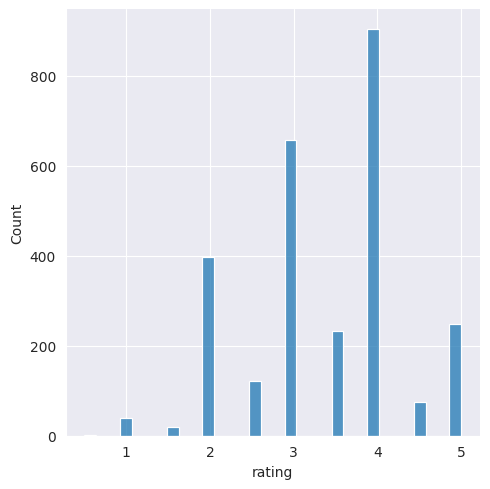

In [11]:
sns.displot(u414_r['rating'], kde = False)

In [12]:
# user-rating df
r_u = df.drop('movieId', axis = 1)
r_u

,userId,rating
0,1,4.0
1,1,4.0
2,1,4.0
3,1,5.0
4,1,5.0
...,...,...
100831,610,4.0
100832,610,5.0
100833,610,5.0
100834,610,5.0


In [13]:
r_u_means = pd.DataFrame(r_u.groupby('userId')['rating'].mean()).reset_index()
r_u_means.rename(columns = {"rating":"mean_rating"}, inplace = True)
r_u_means

,userId,mean_rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
...,...,...
605,606,3.657399
606,607,3.786096
607,608,3.134176
608,609,3.270270


array([[<Axes: title={'center': 'mean_rating'}>]], dtype=object)

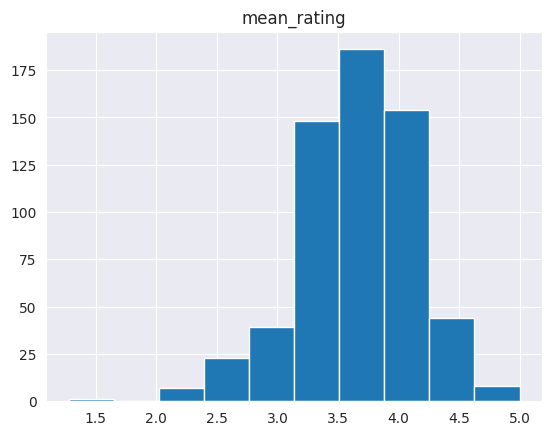

In [14]:
r_u_means.hist(column = ["mean_rating"])

In [15]:
# we get to check movie viewership
movie_views = pd.DataFrame(df.groupby('movieId')['userId'].nunique()).reset_index()
movie_views.rename(columns = {"userId":"no. of views"}, inplace = True)
movie_views

,movieId,no. of views
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [16]:
highest_views = movie_views["no. of views"].max()
movie_x = movie_views[movie_views["no. of views"] == highest_views]
movie_x

,movieId,no. of views
314,356,329


In [17]:
# we now get the ratings for movie356 and the mean rating
movie356 = df[df.movieId == 356]
movie356

,userId,movieId,rating
20,1,356,4.0
725,6,356,5.0
880,7,356,5.0
1053,8,356,3.0
1120,10,356,3.5
...,...,...,...
97154,605,356,3.0
97428,606,356,4.0
98735,608,356,3.0
99514,609,356,4.0


In [18]:
movie356.rating.mean()

4.164133738601824

In [19]:
# getting each movie-rating df
r_i = df.drop('userId', axis = 1)
r_i.sort_values(by = ['movieId'])

,movieId,rating
0,1,4.0
81531,1,4.0
30517,1,3.5
81082,1,4.0
30601,1,3.0
...,...,...
27256,193581,4.0
27257,193583,3.5
27258,193585,3.5
27259,193587,3.5


In [20]:
r_i_means = pd.DataFrame(r_i.groupby('movieId')['rating'].mean()).reset_index()
r_i_means.rename(columns = {"rating":"mean_rating"}, inplace = True)
r_i_means

,movieId,mean_rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


array([[<Axes: title={'center': 'mean_rating'}>]], dtype=object)

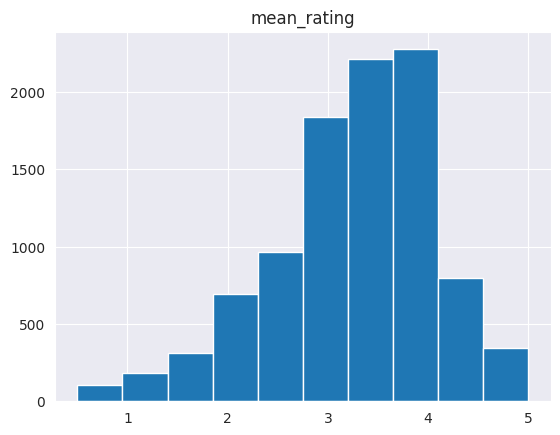

In [21]:
r_i_means.hist(column = ["mean_rating"])

In [22]:
movies_df = pd.merge(movies, movie_views, how="inner")
movies_df = pd.merge(movies_df, r_i_means, how="inner")
movies_df.head()

,movieId,title,genres,no. of views,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


Our objective is to recommend movies to a user based on their previously watched and rated movies. We are building a recommendation system using previous ratings to get a user's prediction of unwatched movies. The highest predictions are recommended. This is an item-item similarity problem.

## Collaborative filtering
### Determining the best model

In [23]:
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156247 sha256=df1221c37b6fb49a91f47d373c095366f0a83918f8482db49b81a350e35bfb3f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [24]:
#importing modules from scikit-surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline
from surprise import accuracy

In [25]:
#loading the dataset into a surprise readable format
reader = Reader()
data = Dataset.load_from_df(df, reader)

In [26]:
#splitting the data to be able to make predictions
trainset, testset = train_test_split(data, test_size=0.25)

**SVD**

In [27]:
param_grid = {'n_factors':[50, 100],'n_epochs': [10, 20], 'lr_all': [0.002, 0.005]}
grid_search = GridSearchCV(SVD,param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
grid_search.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


In [28]:
grid_search.best_params, grid_search.best_score

({'rmse': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005},
  'mae': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005}},
 {'rmse': 0.8705253867536094, 'mae': 0.6690425629409696})

In [29]:
svd = SVD(n_factors= 50, n_epochs= 20, lr_all = 0.005)

In [30]:
svd.fit(trainset)

In [31]:
predictions = svd.test(testset)

In [32]:
print(accuracy.rmse(predictions))

RMSE: 0.8730
0.8730213006938851


In [33]:
cv = cross_validate(svd, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8692  0.8744  0.8774  0.8700  0.8625  0.8707  0.0051  
MAE (testset)     0.6689  0.6744  0.6716  0.6683  0.6631  0.6692  0.0038  
Fit time          1.44    2.09    2.61    2.21    2.33    2.14    0.39    
Test time         0.13    0.27    0.74    0.25    0.76    0.43    0.26    


## KNN, KNNBasic and KNNBaseline

In [34]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [35]:
param_grid2 = {'sim_options':{'name':["pearson", "cosine"]}}
grid_search2 = GridSearchCV(KNNBasic, param_grid=param_grid2, n_jobs = -1, joblib_verbose=5)
grid_search2.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.2s finished


In [36]:
grid_search2.best_params, grid_search2.best_score

({'rmse': {'sim_options': {'name': 'cosine', 'user_based': True}},
  'mae': {'sim_options': {'name': 'cosine', 'user_based': True}}},
 {'rmse': 0.9723367474828499, 'mae': 0.748433597370793})

In [37]:
sim_cos = {"name": "cosine", "user_based": True}
basic = KNNBasic(sim_options = sim_cos)

In [38]:
basic.fit(trainset)
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9773
0.9773084878534497


In [39]:
param_grid3 = {'sim_options':{'name':["pearson", "cosine"]}}
grid_search3 = GridSearchCV(KNNWithMeans, param_grid=param_grid3, n_jobs = -1, joblib_verbose=5)
grid_search3.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.1s finished


In [40]:
grid_search3.best_params, grid_search3.best_score

({'rmse': {'sim_options': {'name': 'pearson', 'user_based': True}},
  'mae': {'sim_options': {'name': 'pearson', 'user_based': True}}},
 {'rmse': 0.8977663991573005, 'mae': 0.6847595581077892})

In [41]:
sim_pears = {"name": "pearson", "user_based": True}
withmeans = KNNWithMeans(sim_options = sim_pears)

In [42]:
withmeans.fit(trainset)
predictions = withmeans.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8959
0.8959490157995734


In [43]:
param_grid4 = {'sim_options':{'name':["pearson", "cosine"]}}
grid_search4 = GridSearchCV(KNNBaseline, param_grid=param_grid4, n_jobs = -1, joblib_verbose=5)
grid_search4.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.5s finished


In [44]:
grid_search4.best_params, grid_search4.best_score

({'rmse': {'sim_options': {'name': 'pearson', 'user_based': True}},
  'mae': {'sim_options': {'name': 'pearson', 'user_based': True}}},
 {'rmse': 0.8768176862800999, 'mae': 0.670262979753573})

In [45]:
sim_pears = {"name": "pearson", "user_based": True}
baseline = KNNBaseline(sim_options = sim_pears)

In [46]:
baseline.fit(trainset)
predictions = baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8791
0.8790762363128722


The best model so far is SVD using RMSE as the validation metrics.
We will therefore use this to build a recommendation function.

## Recommender

In [47]:
def recommender(uid,rating_data, movie_data):
  # creating a list of all the movie ids
  total_ids = [item for item in movie_data.movieId]

  # subsetting the rating_data using a user's id to get the movies they have watched
  userx = rating_data[rating_data.userId == uid]

  # creating a list of ids for the movies watched by the user
  watched_ids = [item for item in userx.movieId]

  # creating a list of ids for the movies they have not watched
  unwatched_ids = [item for item in total_ids if item not in watched_ids]

  # getting a user's predicted ratings for movies they haven't watched
  estimates = list(map(lambda x : svd.predict(uid,x).est, unwatched_ids))

  # creating a dictionary; the keys are the unwatched movie ids and the values are the predictions
  res = dict(map(lambda i,j : (i,j) , unwatched_ids,estimates))

  # creating a dataframe from the dictionary containing the predictions
  predicted_ratings = pd.DataFrame.from_dict(res, orient = "index", columns=["predicted ratings"]).reset_index()
  predicted_ratings = predicted_ratings.rename(columns={"index": "movieId"})
  predicted_ratings = predicted_ratings.sort_values("predicted ratings", ascending = False)

  # merging the dataframe above with the movie dataset to get the movie names
  recommendations = predicted_ratings.iloc[0:5]
  recommendations = pd.merge(recommendations, movies, how = "inner")
  recommendations
  return recommendations



In [48]:
recommender(2,df,movies)

,movieId,predicted ratings,title,genres
0,1104,4.429972,"Streetcar Named Desire, A (1951)",Drama
1,898,4.384687,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
2,750,4.374657,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
3,1204,4.374206,Lawrence of Arabia (1962),Adventure|Drama|War
4,1242,4.359736,Glory (1989),Drama|War


In [49]:
recommender(414,df,movies)

,movieId,predicted ratings,title,genres
0,2288,4.352490,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller
1,905,4.348844,It Happened One Night (1934),Comedy|Romance
2,3030,4.271685,Yojimbo (1961),Action|Adventure
3,955,4.254260,Bringing Up Baby (1938),Comedy|Romance
4,1209,4.239615,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western


In [50]:
recommender(500,df,movies)

,movieId,predicted ratings,title,genres
0,1208,4.130770,Apocalypse Now (1979),Action|Drama|War
1,1089,4.097605,Reservoir Dogs (1992),Crime|Mystery|Thriller
2,1104,3.997622,"Streetcar Named Desire, A (1951)",Drama
3,1136,3.973872,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
4,318,3.942741,"Shawshank Redemption, The (1994)",Crime|Drama
